# Activity 2 - Introduction to ScikitLearn

<a href="https://colab.research.google.com/github/intelligent-environments-lab/occupant_centric_grid_interactive_buildings_course/blob/main/src/notebooks/activity/A2-scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network based classification

In [60]:
from sklearn.datasets import load_digits
digits = load_digits()

** 2. Data structure **

In [61]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)

Image Data Shape (1797, 64)


In [62]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Label Data Shape (1797,)


In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

** 3. Visualization **

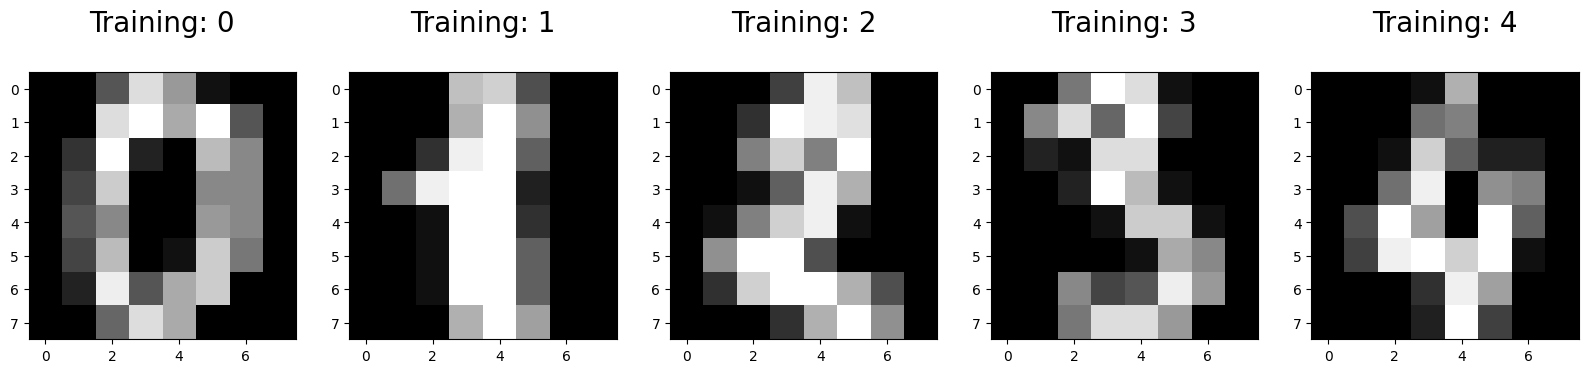

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

** 4. Splitting data **

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

** 5. Load neural network model **

In [14]:
from sklearn.neural_network import MLPClassifier  

In [15]:
# all parameters not specified are set to their defaults
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  

In [16]:
MLPClassifier?

Init signature:
MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

  

** 6. Train the model **

In [17]:
mlp.fit(x_train, y_train)  

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

** 7. Test the model **

In [18]:
# Returns a NumPy Array
# Predict for One Observation (image)
mlp.predict(x_test[0].reshape(1,-1))

array([1])

In [19]:
mlp.predict(x_test[0:10])

array([1, 3, 7, 0, 6, 3, 1, 6, 7, 2])

In [20]:
predictions = mlp.predict(x_test)

In [21]:
mlp.n_iter_

551

** 8. Evaluate the model **

In [22]:
# Use score method to get accuracy of model
score_1 = mlp.score(x_test, y_test)
print(score_1)

0.9066666666666666


In [23]:
from sklearn.model_selection import cross_validate

scores_2 = cross_validate(mlp, x_test, y_test, scoring='precision_macro', cv=5, return_train_score=False)

In [24]:
cross_validate?

Signature:
cross_validate(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    return_train_score=False,
    return_estimator=False,
    error_score=nan,
)
Docstring:
Evaluate metric(s) by cross-validation and also record fit/score times.

Read more in the :ref:`User Guide <multimetric_cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with 

In [25]:
scores_2

{'fit_time': array([0.49455905, 0.6725471 , 0.55177808, 0.86607289, 0.5853889 ]),
 'score_time': array([0.00093102, 0.00083399, 0.00086188, 0.00077105, 0.00077295]),
 'test_score': array([0.83554473, 0.81616689, 0.85059524, 0.84027778, 0.83191087])}

In [26]:
# various scoring options: http://scikit-learn.org/stable/modules/cross_validation.html

** 8.1 Confusion matrix **

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [28]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[55  0  0  0  1  3  0  0  0  0]
 [ 1 42  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  1  2  4]
 [ 0  3  0  0 45  0  0  0  1  0]
 [ 1  0  0  1  1 41  0  0  0  0]
 [ 0  1  0  0  1  0 42  0  0  0]
 [ 0  0  1  6  0  0  0 37  1  4]
 [ 0  1  1  0  0  0  0  0 32  0]
 [ 0  3  0  0  0  0  0  0  4 36]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        59
           1       0.84      0.98      0.90        43
           2       0.95      1.00      0.97        39
           3       0.85      0.85      0.85        46
           4       0.94      0.92      0.93        49
           5       0.93      0.93      0.93        44
           6       1.00      0.95      0.98        44
           7       0.97      0.76      0.85        49
           8       0.80      0.94      0.86        34
           9       0.82      0.84      0.83        43

    accuracy                           0.91       450
   macro avg       

** 9. Wrong classification **

In [29]:
misclassifiedIndexes = []
for i in range(len(y_test)):
    if y_test[i] != predictions[i]:
        misclassifiedIndexes.append(i)

In [30]:
misclassifiedIndexes

[27,
 35,
 53,
 70,
 79,
 86,
 92,
 102,
 117,
 125,
 158,
 175,
 192,
 201,
 207,
 208,
 225,
 227,
 240,
 272,
 275,
 280,
 296,
 302,
 304,
 314,
 322,
 328,
 340,
 343,
 355,
 368,
 370,
 371,
 372,
 388,
 390,
 409,
 434,
 435,
 441,
 445]

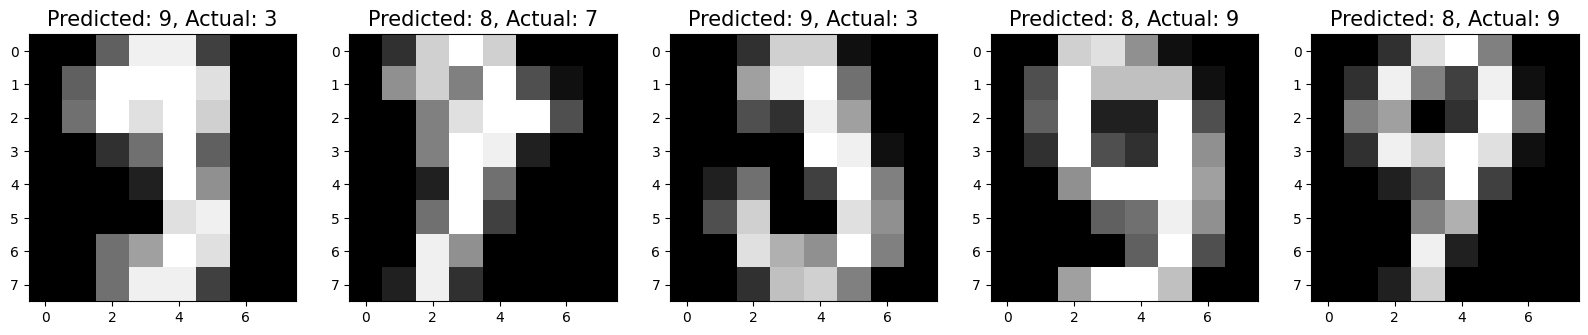

In [31]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), 
              fontsize = 15)

example is from https://archive.ics.uci.edu/ml/datasets/iris

** 1. Import data **

In [38]:
import pandas as pd

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']


from sklearn.datasets import load_iris
data = load_iris()

# Read dataset to pandas dataframe
irisdata = pd.DataFrame(data=data.data,  
                  columns=data.feature_names)  

** 2. Data structure **

In [39]:
irisdata.head()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]

# Assign data from first fifth columns to y variable
y = irisdata.select_dtypes(include=[object])  

In [41]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
y.head()

""
0
1
2
3
4


** 3. Split data **

In [56]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

** 4. Feature scaling **

In [55]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

""
90
34
149
94
13
...
62
112
121
81


** 5. Training the model **

In [59]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values)  

ValueError: Found array with 0 feature(s) (shape=(120, 0)) while a minimum of 1 is required.

In [ ]:
predictions = mlp.predict(X_test)  

In [ ]:
predictions

** 6. Evaluation **

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

## Neural network based regression

the data is from UC Irvine Machine Learning repository

** 1. Read data **

In [63]:
eD = pd.read_csv('energyData.csv') 

In [64]:
eD.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1'], dtype='object')

In [65]:
len(eD)

768

In [66]:
eD.size

6912

In [67]:
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4413383a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe441338a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe441338040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe441340160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe441340490>],
 'means': []}

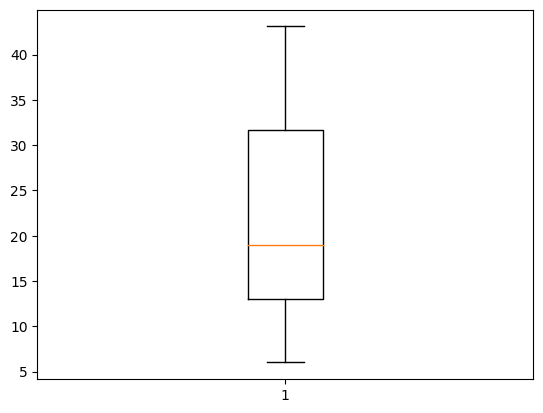

In [68]:
plt.boxplot(eD['Y1'])

** 2. Separate the data **

In [69]:
X = eD.iloc[:, 0:8]

y = eD['Y1']

In [70]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [71]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

** 3. Split the data & 4. Learn the model**

In [72]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [73]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [74]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
model.fit(X_train, y_train) 

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [75]:
MLPRegressor?

Init signature:
MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    *,
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
Docstring:     
Multi-layer Perceptron regressor.

This model optimizes the squared error using LBFGS or stochastic gradient
descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'i

In [76]:
predictions = model.predict(X_test)  

In [77]:
predictions

array([20.2286114 , 12.50756745, 15.77957995, 27.29796041, 39.36928364,
       12.84726032, 14.66056961, 12.36784902, 28.16806738, 12.93011623,
       28.199753  , 31.34561354, 12.25779904, 30.75916864, 20.01618239,
       39.67021506, 12.31247918, 12.29754444, 39.40828405, 22.96129961,
       15.6802154 , 13.17079249, 28.13037922, 12.28635608, 24.00098124,
       12.49412616, 12.5656598 , 13.04345928, 19.43388074, 30.57987032,
       29.02686238, 28.94654563, 20.33650967, 24.0335032 , 27.38304018,
       18.83212812, 28.50300036, 24.4805508 , 39.14866897, 15.26232223,
       31.27829693, 30.19630621, 24.20307787, 12.66216299, 27.50522323,
       28.50068442, 28.98786197, 27.79984001, 12.33936176, 32.83456692,
       27.40585868, 12.78525935, 30.2789389 , 28.32370203, 19.74387564,
       11.9238216 , 12.40670775, 27.6131215 , 12.94258466, 20.22344521,
       11.87228106, 28.40785216, 15.57231713, 27.87282131, 20.8486012 ,
       16.81409539, 12.16007894, 20.81607923, 19.29682804, 30.23

** 5. Visualization & Evaluation **

In [78]:
import seaborn as sns
%matplotlib inline

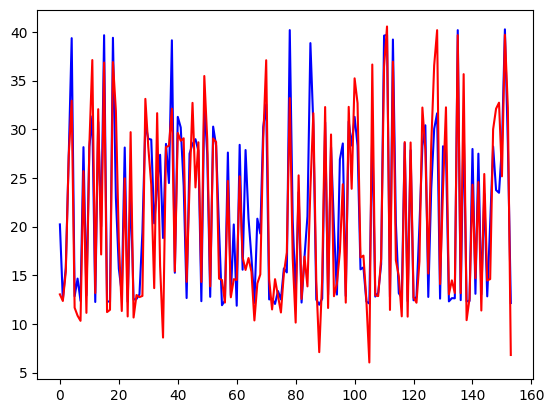

In [79]:
plt.plot(predictions, color='b')
plt.plot(y_test.values, color='r')

In [80]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

16.41834896076752

In [81]:
mean_squared_error?
# scikitlearn model evaluation google search for other evaluation metrics

Signature:
mean_squared_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    squared=True,
)
Docstring:
Mean squared error regression loss.

Read more in the :ref:`User Guide <mean_squared_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

squared : bool, default=Tr

In [ ]:
Re = pd.read_csv('3_Real_estate.csv') 

In [ ]:
Re.head()

In [ ]:
Re.columns

In [ ]:
y1 = Re[' PRC ']
y2 = Re['EPL']

In [ ]:
x = Re.iloc[:,2:13]

In [ ]:
x.head()

In [ ]:
sns.boxplot(x=Re['EPL'], y=Re[' PRC '], order=['A','B','C','D','E','F','G'])

In [ ]:
sns.boxplot?

In [ ]:
sns.swarmplot(x=Re['EPL'], y=Re[' PRC '], order=['A','B','C','D','E','F','G'])

In [ ]:
sns.violinplot(x=Re['EPL'], y=Re[' PRC '], order=['A','B','C','D','E','F','G'])

In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size = 0.20)

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
model.fit(X_train, y_train) 

In [ ]:
predictions = model.predict(X_test)  
predictions

In [ ]:
plt.plot(predictions, color='b')
plt.plot(y_test.values, color='r')

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

**Think your domain knowledge first**

# Lessons learned today

### 1. Using scikit learn is pretty simple (once you practice the basic procedure)

### 2. Data preprocessing is important, if you want to make your data analysis simpler

### 3. Analyzing final result needs your domain knowledge